# Econ 441A Assignment 2
## Juntao Li
## Student ID: 906092273

### 2/a)

In [40]:
!pip install wooldridge

In [41]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
wage=woo.data('wage2')

In [7]:
from statistics import mean,stdev
print("Average IQ is",mean(wage.IQ))
print("Average salary is",mean(wage.wage))
print("The standard deviation of IQ is",stdev(wage.IQ))

Average IQ is 101.28235294117647
Average salary is 957.9454545454546
The standard deviation of IQ is 15.052636370265098


### 2/b)

In [9]:
reg1=smf.ols('wage~IQ',data=wage)
results1=reg1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     98.55
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.79e-22
Time:                        12:16:19   Log-Likelihood:                -6891.4
No. Observations:                 935   AIC:                         1.379e+04
Df Residuals:                     933   BIC:                         1.380e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.9916     85.642      1.366      0.172     -51.081     285.064
IQ             8.3031      0.836      9.927      0.000       6.662       9.944
==============================================================================
Omnibus:                      208.281   Durbin-Watson:                   1.802
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.184
Skew:                           1.157   Prob(JB):                    2.74e-116
Kurtosis:                       5.882   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 8.3031*15=124.5465. So the predicted increase in wage for an increase in IQ of 15 points is 124.5465 dollars. Since R-squared is 0.096, then IQ does not explain most of the variation in wage.

### 2/c)

In [17]:
reg2=smf.ols('np.log(wage)~IQ',data=wage)
results2=reg2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     102.6
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           5.93e-23
Time:                        20:53:59   Log-Likelihood:                -468.85
No. Observations:                 935   AIC:                             941.7
Df Residuals:                     933   BIC:                             951.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8870      0.089     66.131      0.000       5.712       6.062
IQ             0.0088      0.001     10.130      0.000       0.007       0.011
==============================================================================
Omnibus:                       32.293   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.621
Skew:                          -0.329   Prob(JB):                     1.24e-10
Kurtosis:                       3.859   Cond. No.                         697.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 0.0088*15=0.132. So the predicted approximate percentage increase in wage for an increase in IQ of 15 points is 13.2%.

### 2/d)

#### The intercepts in the above models represent the predicted wage and log_wage when IQ is 0 point. However, since 0 IQ is not in the database, the intercept does not have a meaningful interpretation.

### 3/a)

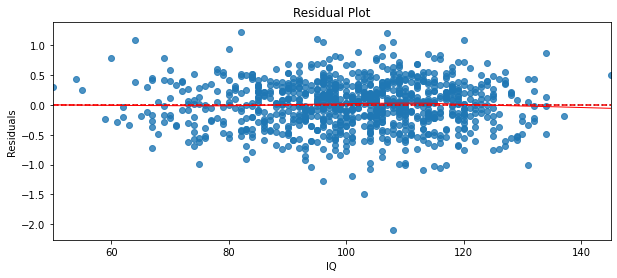

In [37]:
plt.figure(figsize=(10,4))
sns.residplot(x="IQ",y="lwage",data=wage,lowess=True,line_kws={'color':'red',"lw":1,'alpha':1})
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

#### From the residuals plot, we can see that most of the residuals are very close to the lowess smoother, which means there are not so many outliers in the data.

### 3/b)

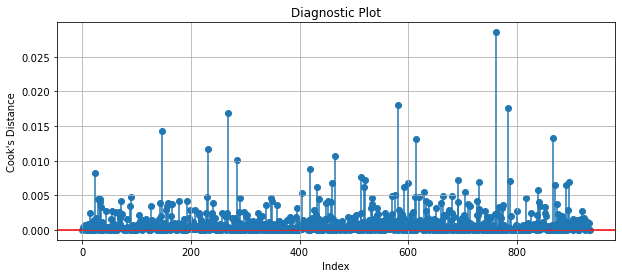

In [29]:
cooks_distance=results2.get_influence().cooks_distance
plt.figure(figsize=(10,4))
plt.scatter(wage.index,cooks_distance[0])
plt.axhline(0,color='red')
plt.vlines(x=wage.index,ymin=0,ymax=cooks_distance[0])
plt.xlabel('Index')
plt.ylabel('Cook\'s Distance')
plt.title("Diagnostic Plot")
plt.grid()

#### Most cook's distances are between 0 and 0.005 and several cook's distances are relatively big. The highest cook's distance is as big as 0.028, which is an example of unusual observations.

### 3/c)

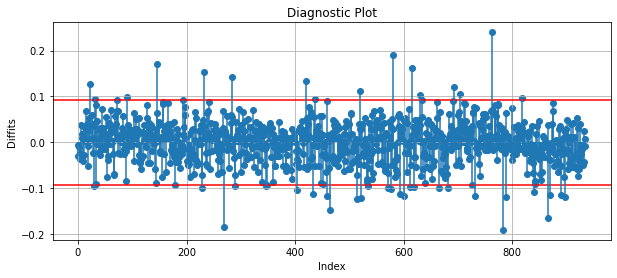

In [34]:
dffits,threshold=results2.get_influence().dffits
plt.figure(figsize=(10,4))
plt.scatter(wage.index,dffits)
plt.axhline(threshold,color='red')
plt.axhline(-threshold,color='red')
plt.vlines(x=wage.index,ymin=0,ymax=dffits)
plt.xlabel('Index')
plt.ylabel('Diffits')
plt.title("Diagnostic Plot")
plt.grid()

#### There are several observations which are very far away from the threshold and they deserve additional scrutiny.

### 3/d)

In [47]:
datanew  = wage[np.abs(dffits)<threshold]
reg3 = smf.ols('lwage ~ IQ', data = datanew)
results3 = reg3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     133.8
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           6.38e-29
Time:                        13:52:34   Log-Likelihood:                -335.20
No. Observations:                 891   AIC:                             674.4
Df Residuals:                     889   BIC:                             684.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8304      0.084     69.463      0.000       5.666       5.995
IQ             0.0095      0.001     11.566      0.000       0.008       0.011
==============================================================================
Omnibus:                        7.323   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.736
Skew:                          -0.163   Prob(JB):                       0.0345
Kurtosis:                       2.727   Cond. No.                         727.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3/e)

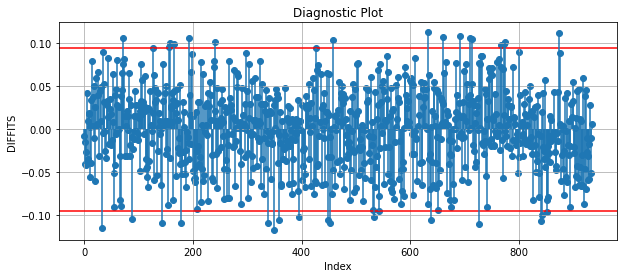

In [49]:
dffits, threshold1 = results3.get_influence().dffits

plt.figure(figsize = (10, 4))
plt.scatter(datanew.index, dffits)
plt.axhline(threshold1, color = 'red')
plt.axhline(-threshold1, color = 'red')
plt.vlines(x = datanew.index, ymin = 0, ymax = dffits)
plt.xlabel('Index')
plt.ylabel('DIFFITS')
plt.title("Diagnostic Plot")
plt.grid()

#### The intercept changes from 5.8870 to 5.8304 and the coefficient for IQ changes from 0.0088 to 0.0095. From the diagnostic plots for 2/c) and 3/e), we can see that there are less outliers in the diagnostic plot in 3/c), so the regression parameters are stable. In addition, the R^2 in regression in 2/c) is 0.099 and the R^2 in regression in 3/d) is 0.131, which means IQ in the regression in 3/d) explains more variation in log(wage). So the regression is more fit in 3/d).

### 3/f)

#### Some influential observations exist because special conditions happen on a certain type of group and they should not be removed in order to make the regression a better reflection of the relationship between the variables. However, influential observations which are selected due to errors made when sampling the dataset should be removed.